# Feature Engineering

## Dealing with Outlier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def create_ages(mu=50, sigma=13, num_samples=100, seed=42):
    """
    Create a normal distribution and
    Return a sample of random rounded ages
    """
    np.random.seed(seed)
    
    sample_ages = np.random.normal(loc=mu, scale=sigma, size=num_samples)
    sample_ages = np.round(sample_ages, decimals=0)
    
    return sample_ages

In [3]:
sample = create_ages()
sample

array([56., 48., 58., 70., 47., 47., 71., 60., 44., 57., 44., 44., 53.,
       25., 28., 43., 37., 54., 38., 32., 69., 47., 51., 31., 43., 51.,
       35., 55., 42., 46., 42., 74., 50., 36., 61., 34., 53., 25., 33.,
       53., 60., 52., 48., 46., 31., 41., 44., 64., 54., 27., 54., 45.,
       41., 58., 63., 62., 39., 46., 54., 63., 44., 48., 36., 34., 61.,
       68., 49., 63., 55., 42., 55., 70., 50., 70., 16., 61., 51., 46.,
       51., 24., 47., 55., 69., 43., 39., 43., 62., 54., 43., 57., 51.,
       63., 41., 46., 45., 31., 54., 53., 50., 47.])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

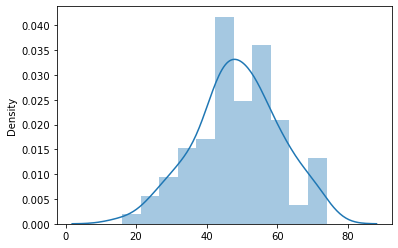

In [4]:
sns.distplot(sample)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

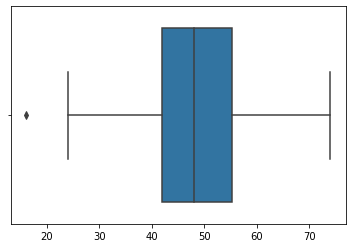

In [5]:
sns.boxplot(sample)

In [6]:
ser = pd.Series(sample)

In [7]:
ser.describe()

count    100.00000
mean      48.66000
std       11.82039
min       16.00000
25%       42.00000
50%       48.00000
75%       55.25000
max       74.00000
dtype: float64

In [8]:
IQR = 55.25 - 42.0
lower_lim = 42 - 1.5*IQR

In [9]:
lower_lim

22.125

In [10]:
np.percentile(sample, [25])

array([42.])

In [11]:
df = pd.read_csv("../DATA/Ames_Housing_Data.csv")

In [12]:
df.head().T

,0,1,2,3,4
PID,526301100,526350040,526351010,526353030,527105010
MS SubClass,20,20,20,20,60
MS Zoning,RL,RH,RL,RL,RL
Lot Frontage,141.0,80.0,81.0,93.0,74.0
Lot Area,31770,11622,14267,11160,13830
...,...,...,...,...,...
Mo Sold,5,6,6,4,3
Yr Sold,2010,2010,2010,2010,2010
Sale Type,WD,WD,WD,WD,WD
Sale Condition,Normal,Normal,Normal,Normal,Normal


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

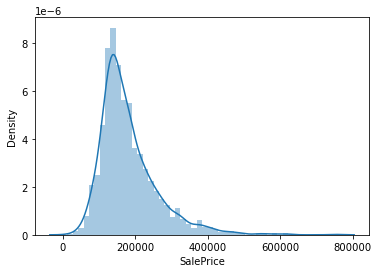

In [13]:
sns.distplot(df["SalePrice"])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice'>

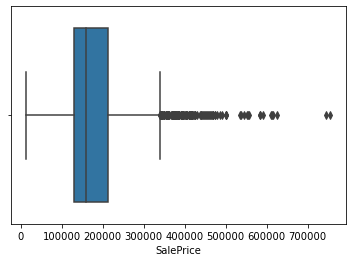

In [14]:
sns.boxplot(df['SalePrice'])

In [15]:
df.corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

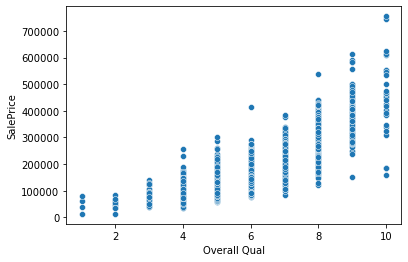

In [16]:
sns.scatterplot(x=df['Overall Qual'], y=df["SalePrice"]);

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

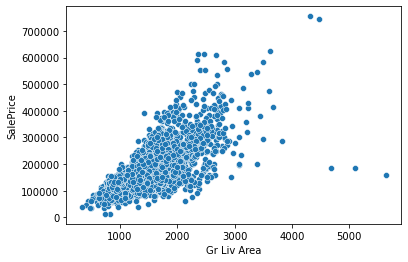

In [17]:
sns.scatterplot(x="Gr Liv Area", y="SalePrice", data=df)

In [18]:
df[(df["Overall Qual"] > 8) & (df['SalePrice'] < 200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [19]:
drop_ind = df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index

In [20]:
df = df.drop(drop_ind)

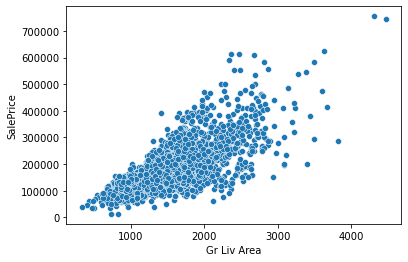

In [21]:
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df);

## Dealing With Missing Data

In [22]:
with open('../DATA/Ames_Housing_Feature_Description.txt', 'r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [23]:
df.drop("PID", axis=1, inplace=True)

In [24]:
100 * df.isnull().sum() / len(df)

MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
Street             0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

In [25]:
def percent_missing(df):
    percent_nan = 100 * df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    
    return percent_nan

In [26]:
percent_nan = percent_missing(df)
percent_nan

Electrical         0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


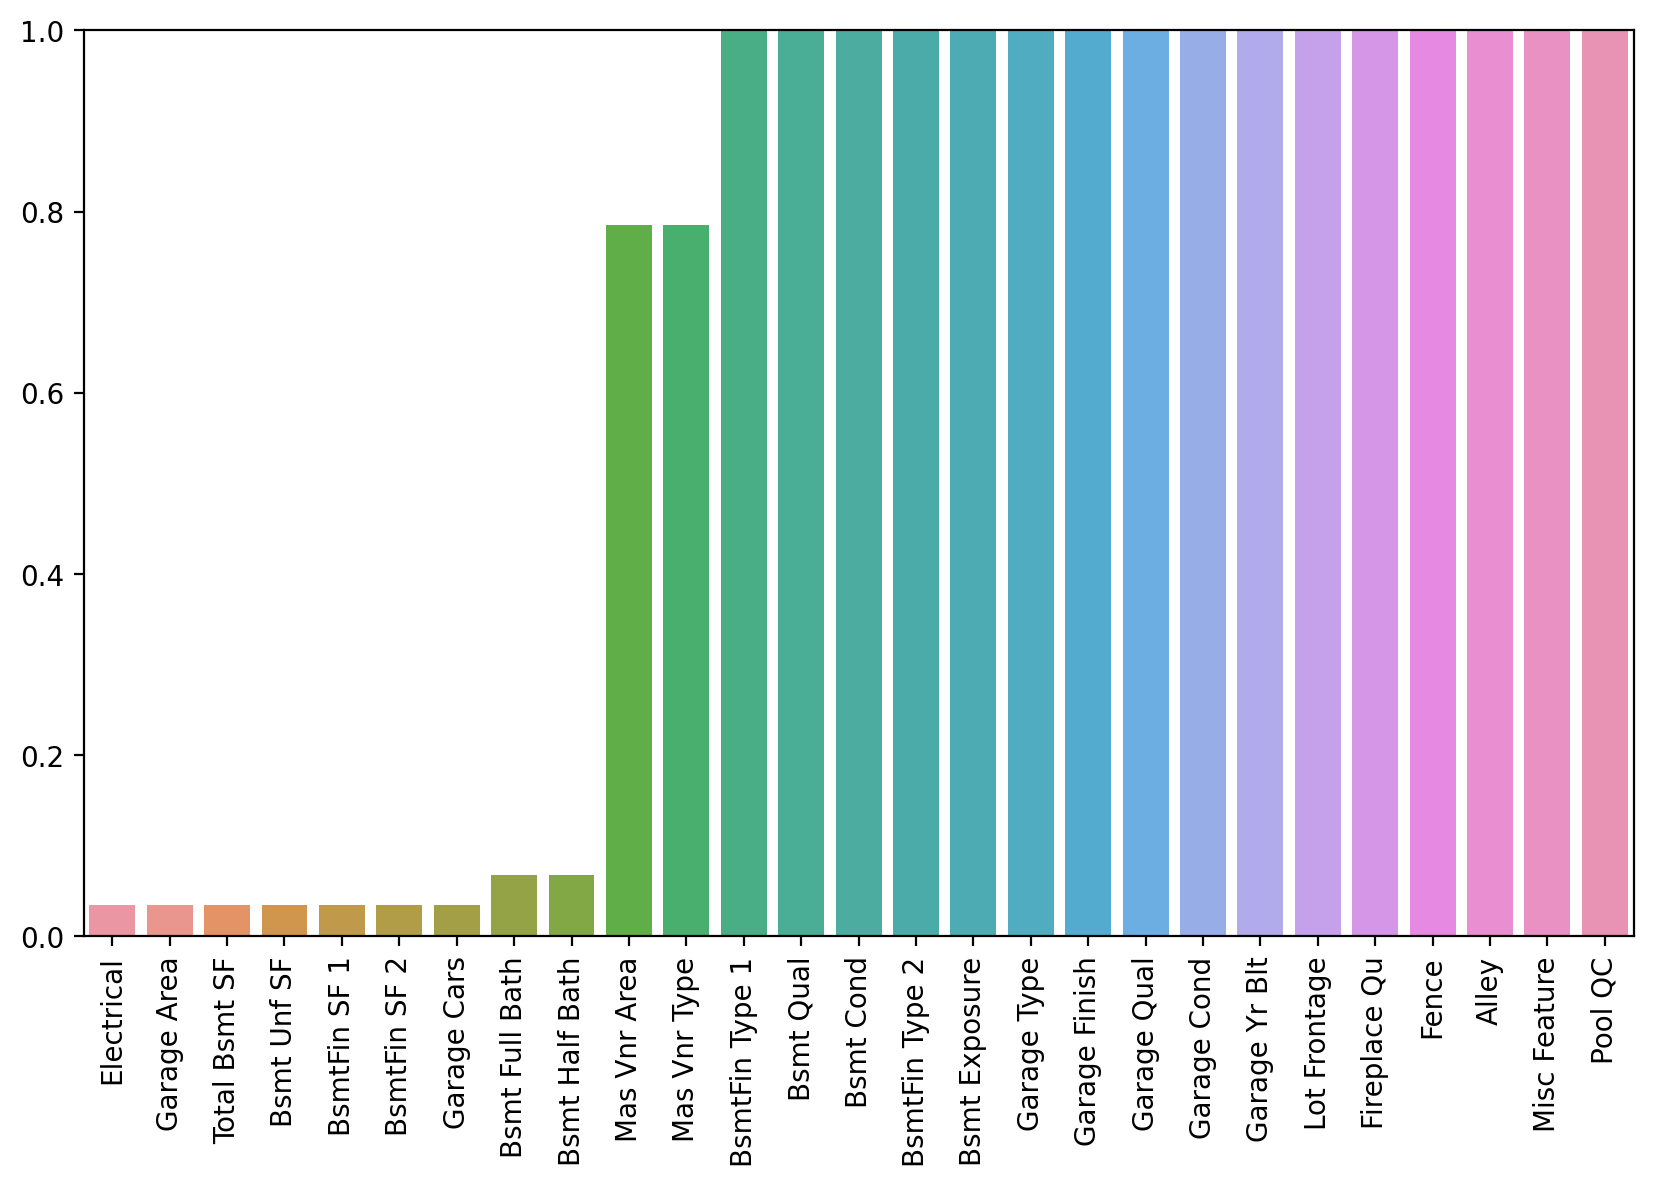

In [27]:
plt.figure(figsize=(10,6), dpi=200)
sns.barplot(percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0,1);

In [28]:
percent_nan[percent_nan < 1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

In [29]:
df[df['Electrical'].isnull()]['Garage Area']

1577    400.0
Name: Garage Area, dtype: float64

In [30]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [31]:
df.dropna(subset=['Electrical', 'Garage Cars'], inplace=True)

In [32]:
percent_nan = percent_missing(df)
percent_nan[percent_nan < 1]

Bsmt Unf SF       0.034188
Total Bsmt SF     0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Type      0.786325
Mas Vnr Area      0.786325
dtype: float64

In [33]:
df[df["Bsmt Half Bath"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [34]:
df[df["Bsmt Full Bath"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [35]:
# BSMT NUMERIC COLUMNS --> fillna 0
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF' , 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

# BSMT STRING COLUMNS
bsmt_str_cols = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [36]:
df[df['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [37]:
df['Mas Vnr Type'].fillna('None', inplace=True)

In [38]:
df['Mas Vnr Area'].fillna(0, inplace=True)

In [39]:
df['Garage Yr Blt'].fillna(0, inplace=True)

In [40]:
lst = ['Garage Cond', 'Garage Qual', 'Garage Finish', 'Garage Type']
for i in lst:
    df[i].fillna('NA', inplace=True)

In [41]:
df.drop(['Pool QC', 'Misc Feature', 'Alley', 'Fence'], axis=1, inplace=True)

In [42]:
df['Fireplace Qu'].fillna('None', inplace=True)

In [43]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value: value.fillna(value.median()))

In [46]:
df['Lot Frontage'].fillna(0, inplace=True)

In [49]:
df.isna().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

In [50]:
df['MS SubClass'] = df['MS SubClass'].apply(str)

In [54]:
my_object_df = df.select_dtypes(include='object')

In [55]:
my_numeric_df = df.select_dtypes(exclude='object')

In [57]:
df_objects_dummies = pd.get_dummies(my_object_df,drop_first=True)

In [58]:
final_df = pd.concat([df_objects_dummies, my_numeric_df], axis=1)

In [59]:
final_df

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,0,0,0,0,1,0,0,0,0,0,...,210,62,0,0,0,0,0,5,2010,215000
1,0,0,0,0,1,0,0,0,0,0,...,140,0,0,0,120,0,0,6,2010,105000
2,0,0,0,0,1,0,0,0,0,0,...,393,36,0,0,0,0,12500,6,2010,172000
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,4,2010,244000
4,0,0,0,0,0,0,0,0,0,1,...,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0,0,0,0,0,0,0,0,0,0,...,120,0,0,0,0,0,0,3,2006,142500
2926,0,0,0,0,1,0,0,0,0,0,...,164,0,0,0,0,0,0,6,2006,131000
2927,0,0,0,0,0,0,0,0,0,0,...,80,32,0,0,0,0,700,7,2006,132000
2928,0,0,0,0,1,0,0,0,0,0,...,240,38,0,0,0,0,0,4,2006,170000
